<h1>Video game sales around the world</h1>
<br>
This document was created by <b>Leonardo Jesus</b>.I'll perform some analysis from this <a href='endereco.com'>dataset</a>.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
#reading the data
videogames = pd.read_csv('vgsales.csv')

In [4]:
videogames.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [5]:
videogames.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
videogames.shape

(16598, 11)

In [9]:
#Making the column names more appealing
videogames.rename(columns = {'NA_Sales': 'North America Sales', 'EU_Sales': 'Europe Sales', 
                             'JP_Sales': 'Japan Sales', 'Other_Sales': 'Other Sales', 
                             'Global_Sales': 'Global Sales'}, inplace=True)
videogames.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,North America Sales,Europe Sales,Japan Sales,Other Sales,Global Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [18]:
#Treating rows where Year is not defined
videogames['Year'].fillna(0, inplace=True)


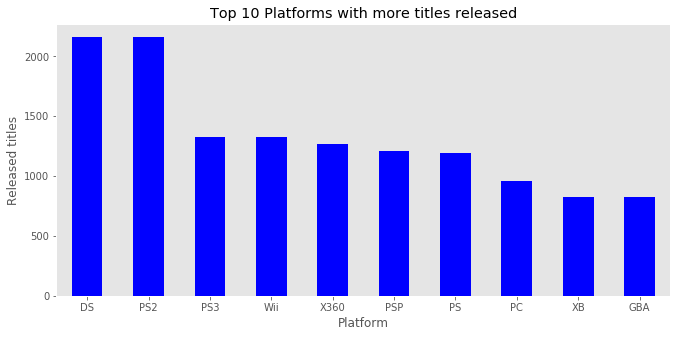

In [22]:
#Graphic
videogames['Platform'].value_counts().head(10).plot(kind='bar', figsize=(11,5), grid=False, rot=0, color='blue')
plt.title('Top 10 Platforms with more titles released')
plt.xlabel('Platform')
plt.ylabel('Released titles')
plt.show()

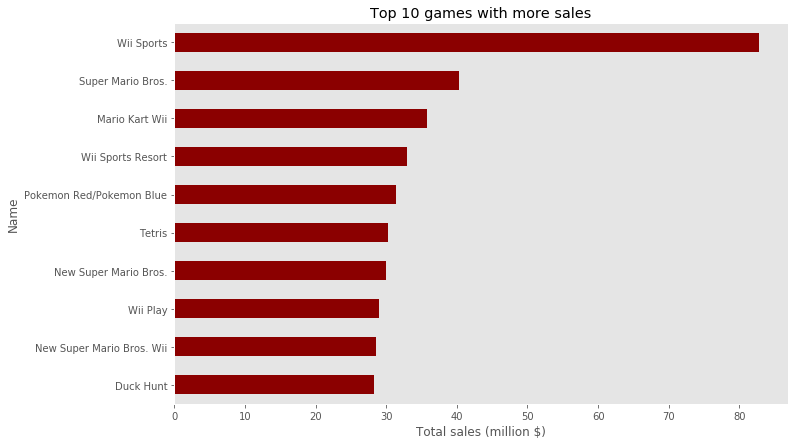

In [24]:
#Top 10 games with more sales in history
top10_sales = videogames[['Name', 'Global Sales']].head(10).set_index('Name').sort_values('Global Sales', ascending=True)
top10_sales.plot(kind='barh', figsize=(11,7), grid=False, color='darkred', legend=False)
plt.title('Top 10 games with more sales')
plt.xlabel('Total sales (million $)')
plt.show()

In [26]:
#Cross-tabulation between Platform and Genre
crosstab_vg = pd.crosstab(videogames['Platform'], videogames['Genre'])
crosstab_vg['Total'] = crosstab_vg.sum(axis=1)
crosstab_vg.head(10)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Platform,,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0,133
3DO,0,1,0,0,0,1,0,0,0,1,0,0,3
3DS,182,37,14,53,28,20,11,86,7,30,26,15,509
DC,3,11,12,0,2,0,6,4,3,1,10,0,52
DS,343,240,36,393,92,238,67,200,42,285,148,79,2163
GB,6,5,0,8,19,15,2,21,1,5,9,7,98
GBA,167,38,23,110,142,41,64,73,40,18,88,18,822
GC,101,20,42,36,73,13,63,27,48,12,110,11,556
GEN,3,2,5,1,7,0,1,3,1,0,3,1,27


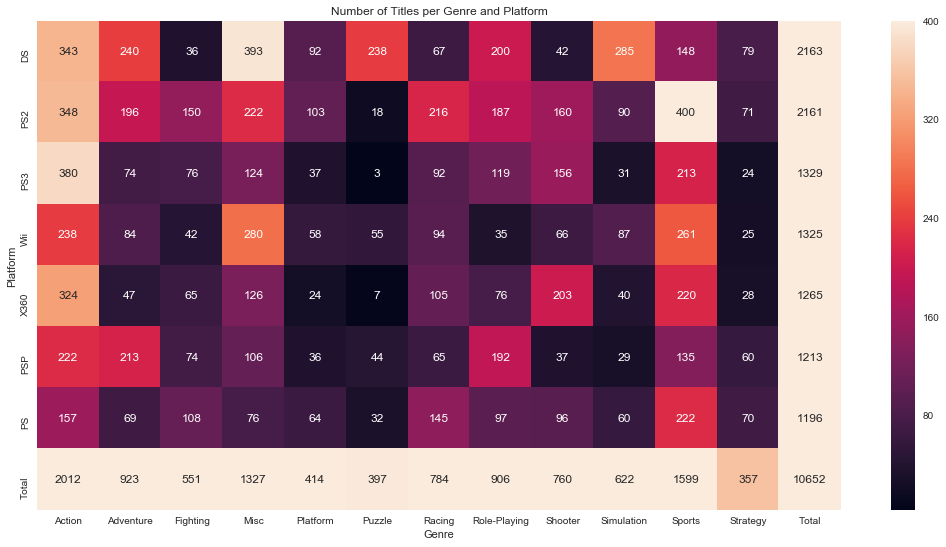

In [29]:
top10_platforms = crosstab_vg[crosstab_vg['Total'] > 1000].sort_values('Total', ascending = False)
top10_final = top10_platforms.append(pd.DataFrame(top10_platforms.sum(), columns=['Total']).T, ignore_index=False)

sns.set(font_scale=1)
plt.figure(figsize=(18, 9))
sns.heatmap(top10_final, annot=True, vmax=top10_final.loc[:'PS', :'Strategy'].values.max(), 
            vmin=top10_final.loc[:, :'Strategy'].values.min(), fmt='d')
plt.xlabel('Genre')
plt.ylabel('Platform')
plt.title('Number of Titles per Genre and Platform')
plt.show()